# Project Title (Credit Card Customer's Churn Analysis)

* Write out the problem statement
* Give a short description of the project


A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

*A business manager of a consumer credit card portfolio is facing the problem of customer attrition. 
1.They want to analyze the data to find out the reason behind this - EDA (Description, causes, correlation) and 
2.leverage the same to predict customers who are likely to drop off.- ML model(To be done later)

In [6]:
#import python libraries for data manipulation and visualization
#import the libaries to work with
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [7]:
# load the data
BankChurners = pd.read_csv('BankChurners.csv',encoding='unicode-escape')
BankChurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# source of data? - kaggle.com (Credit card customers)


In [8]:
#how many rows and columns?
BankChurners.shape

(10127, 23)

In [9]:
#does it have missing values? - no missing values
BankChurners.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
#any other significant details?


In [10]:
BankChurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
BankChurners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [12]:
#data cleasning cells - Removed last 2 columns
BankChurners = BankChurners.drop(labels = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [13]:
BankChurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Data Visualization

In this section, visualize important relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

In [17]:
BankChurners.Customer_Age.head()

0    45
1    49
2    51
3    40
4    40
Name: Customer_Age, dtype: int64

Text(0, 0.5, 'Frequency')

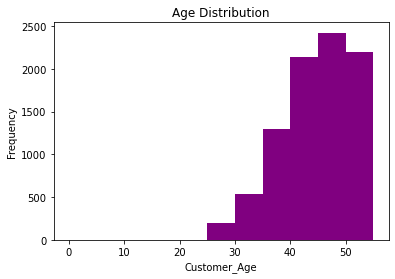

In [111]:
#univariate analysis cells

#plot the list of Customer ages

plt.hist(BankChurners.Customer_Age,bins=list(range(0,60,5)),color='purple')
#plt.hist(age_distribution,bins=10)
#set title and labels for x and y axis
plt.title('Age Distribution')
plt.xlabel('Customer_Age')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Customers by Their Gender')

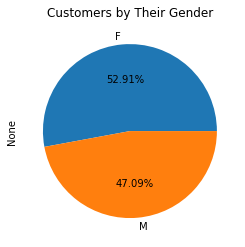

In [154]:
#univariate analysis cells

#plot the pie chart of Gender
from matplotlib.pyplot import pie, axis, show
BankChurners.groupby('Gender').size().plot(kind = 'pie',autopct = '%1.2f%%')
plt.title('Customers by Their Gender')

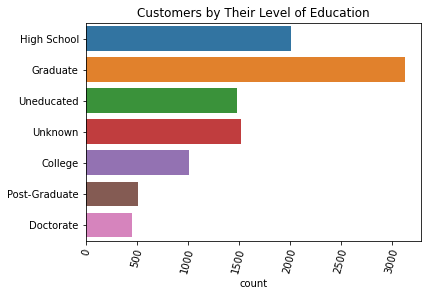

In [147]:
#univariate analysis cells

#plot the bar chart of Level of Education
# from matplotlib.pyplot import pie, axis, show
# BankChurners.groupby('Education_Level').size().plot(kind = 'bar', figsize = (10,8), color = 'Green')
# plt.xticks(rotation=75)
# plt.title('Customers by Their Level of Education')


sns.countplot(y=BankChurners.Education_Level)
plt.xticks(rotation=75);
plt.title('Customers by Their Level of Education')
plt.ylabel(None);

Text(0.5, 1.0, 'Attrited Vs Existing Customers')

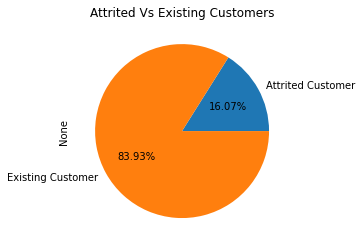

In [115]:
#univariate analysis cells
#plot the pie chart of Attrition_Flag
from matplotlib.pyplot import pie, axis, show
BankChurners.groupby('Attrition_Flag').size().plot(kind = 'pie',autopct = '%1.2f%%')
plt.title('Attrited Vs Existing Customers')

Text(0.5, 1.0, 'Customers by Their Marital Status')

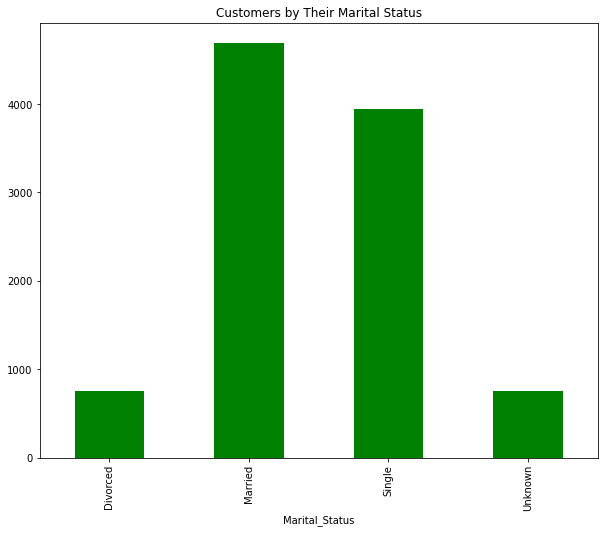

In [124]:
#univariate analysis cells

#plot the bar chart of Marital Status
from matplotlib.pyplot import pie, axis, show
BankChurners.groupby('Marital_Status').size().plot(kind = 'bar', figsize = (10,8), color='Green')
plt.title('Customers by Their Marital Status')

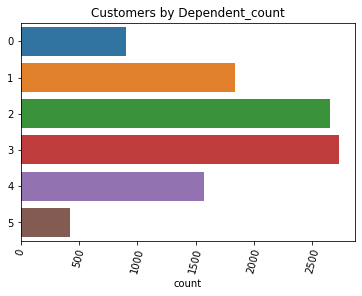

In [153]:
#univariate analysis cells

#plot the list/bar chart of Customer's dependent figures

# from matplotlib.pyplot import pie, axis, show
# BankChurners.groupby('Dependent_count').size().plot(kind = 'bar', figsize = (10,8))
# plt.title('Customers by Dependent_count')


sns.countplot(y=BankChurners.Dependent_count)
plt.xticks(rotation=75);
plt.title('Customers by Dependent_count')
plt.ylabel(None);


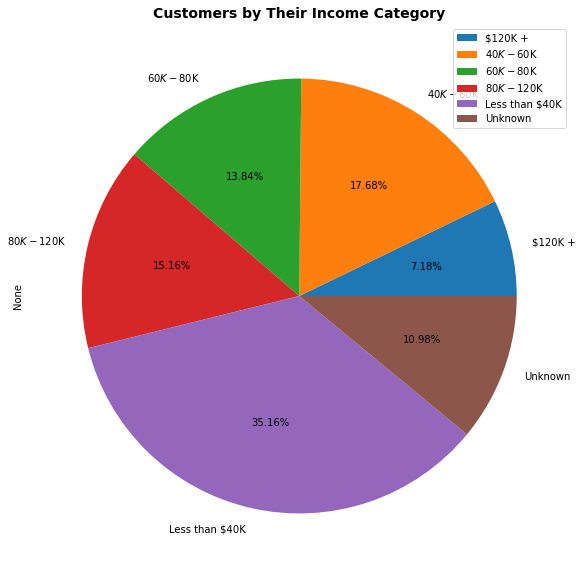

In [145]:
#univariate analysis cells

#plot the Pie chart of Income Category

from matplotlib.pyplot import pie, axis, show
BankChurners.groupby('Income_Category').size().plot(kind = 'pie', figsize=(10,10),subplots=True,legend=True,autopct = '%1.2f%%')
plt.title('Customers by Their Income Category',fontsize=14,fontweight='bold')
plt.show()



Text(0.5, 1.0, 'Customers by Card Categories')

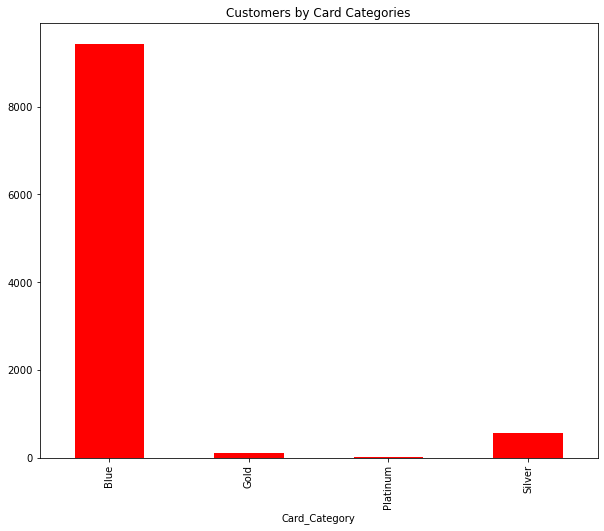

In [150]:
#univariate analysis cells

from matplotlib.pyplot import pie, axis, show
BankChurners.groupby('Card_Category').size().plot(kind = 'bar', figsize = (10,8), color='Red')
plt.title('Customers by Card Categories')

# sns.countplot(y=BankChurners.Card_Category)
# plt.xticks(rotation=75);
# plt.title('Customers by Card Categories')
# plt.ylabel(None);


## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

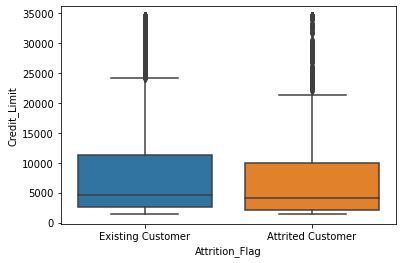

In [36]:
#bivariate analysis cells

#view distribution of prices by location
#your code here
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=BankChurners)

plt.show()

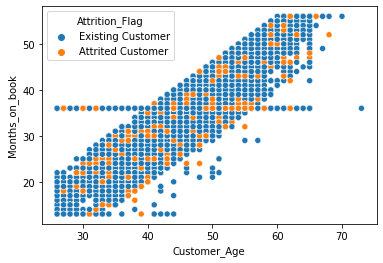

In [131]:
#bivariate analysis cells

#compare months on book and customer age on scatter plot
# x=BankChurners.Customer_Age
# y=BankChurners.Months_on_book

# plt.scatter(x,y)
# plt.title('Customer_Age vs Month_on_book')

# plt.xlabel('Customer_Age')
# plt.ylabel('Months_on_book')

# plt.show()


sns.scatterplot(x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', data=BankChurners)
plt.xlabel("Customer_Age")
plt.ylabel("Months_on_book");


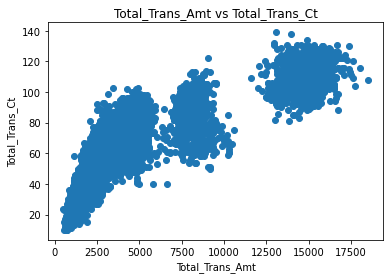

In [157]:
#bivariate analysis cells
#compare months on book and customer age on scatter plot
x=BankChurners.Total_Trans_Amt
y=BankChurners.Total_Trans_Ct

plt.scatter(x,y)
plt.title('Total_Trans_Amt vs Total_Trans_Ct')

plt.xlabel('Total_Trans_Amt')
plt.ylabel('Total_Trans_Ct')

plt.show()


In [49]:
BankChurners.groupby('Attrition_Flag').Credit_Limit.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627,8136,9095,1438,2114,4178,9933,34516
Existing Customer,8500,8726,9084,1438,2602,4643,11252,34516


Attrition_Flag
Attrited Customer    AxesSubplot(0.125,0.125;0.775x0.755)
Existing Customer    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Customer_Age, dtype: object

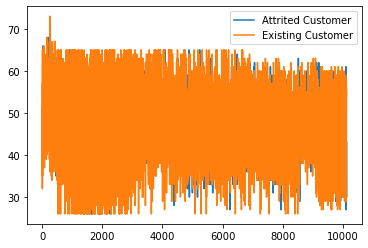

In [67]:
BankChurners.groupby('Attrition_Flag').Customer_Age.plot(legend=True)

In [134]:
BankChurners.groupby('Attrition_Flag').Card_Category.value_counts('%2f')

Attrition_Flag     Card_Category
Attrited Customer  Blue             0.933620
                   Silver           0.050400
                   Gold             0.012907
                   Platinum         0.003073
Existing Customer  Blue             0.931412
                   Silver           0.055647
                   Gold             0.011176
                   Platinum         0.001765
Name: Card_Category, dtype: float64

In [100]:
BankChurners.groupby('Attrition_Flag').Income_Category.value_counts('%2f')

Attrition_Flag     Income_Category
Attrited Customer  Less than $40K     0.376152
                   $40K - $60K        0.166564
                   $80K - $120K       0.148740
                   $60K - $80K        0.116165
                   Unknown            0.114935
                   $120K +            0.077443
Existing Customer  Less than $40K     0.346941
                   $40K - $60K        0.178706
                   $80K - $120K       0.152118
                   $60K - $80K        0.142706
                   Unknown            0.108824
                   $120K +            0.070706
Name: Income_Category, dtype: float64

In [98]:
BankChurners.groupby('Attrition_Flag').Education_Level.value_counts('%2f')

Attrition_Flag     Education_Level
Attrited Customer  Graduate           0.299324
                   High School        0.188076
                   Unknown            0.157345
                   Uneducated         0.145667
                   College            0.094653
                   Doctorate          0.058390
                   Post-Graduate      0.056546
Existing Customer  Graduate           0.310706
                   High School        0.200824
                   Unknown            0.148588
                   Uneducated         0.147059
                   College            0.101059
                   Post-Graduate      0.049882
                   Doctorate          0.041882
Name: Education_Level, dtype: float64

In [91]:
BankChurners.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

<AxesSubplot:>

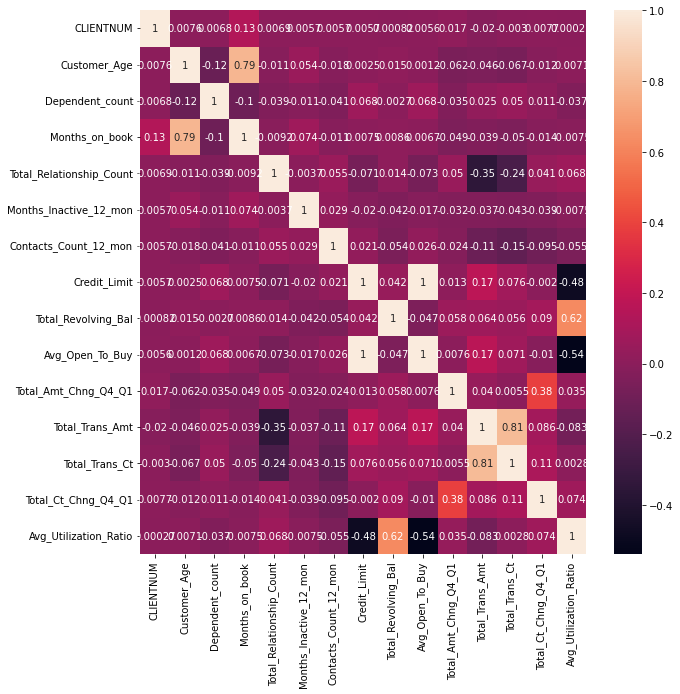

In [35]:
#multivariate analysis cells

#correlations to see which of the variables have linear relationship with each other
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(BankChurners.corr(),annot=True)

In [ ]:
#multivariate analysis cells


In [ ]:
#multivariate analysis cells


# Summary

In this markdown cell, summarize your list of findings.

1. The Bank has 10,127 customers out of which 1,627 are attrited (16.07%)
2. Platinum card holders have the highest percentage of attrition (25%) and the lowest number of customers
3. Months on book and customer age are correlated(0.79) just as transaction amt and transaction count are correlated(0.81)
4. Most attrited customers are youth and most of them have been with the company for atleast 30 months
5. Majority of the customers are females, graduates, aged between 40-50,married, have atleast 3 dependants and earn less than $40k